## **FOREWORD**

*   총 **1117957개**의 레코드로 구성되며 **22개**의 피쳐와 레이블 필드(홍수확률)로 구성
*   필드(**FloodProbability**)가 바로 예측해야 하는 홍수 확률을 나타냄


01. **id:** 승객에게 주어진 일련번호
02. **MonsoonIntensity:** Monsoon(계절적 변화) 강도에 따른 영향
03. **TopographyDrainage:** 지형과 배수 시스템에 따른 영향
04. **RiverManagement:** 강 관리 정책의 영향
05. **Deforestation:** 산림 파괴로 인한 영향
06. **Urbanization:** 도시화로 인한 영향
07. **ClimateChange:** 기후 변화로 인한 영향
08. **DamsQuality:** 댐 품질의 영향
09. **Siltation:** 슬럼 형성으로 인한 영향
10. **AgriculturalPractices:** 농업 관행의 영향
11. **Encroachments:** 침수지 침입으로 인한 영향
12. **IneffectiveDisasterPreparedness:** 비효율적인 재난 대비 조치로 인한 영향
13. **DrainageSystems:** 배수 시스템의 영향
14. **CoastalVulnerability:** 해안 취약성의 영향
15. **Landslides:** 산사태로 인한 영향
16. **Watersheds:** 수원지의 영향
17. **DeterioratingInfrastructure:** 인프라의 악화로 인한 영향
18. **PopulationScore:** 인구 수에 따른 점수
19. **WetlandLoss:** 습지 상실로 인한 영향
20. **InadequatePlanning:** 불충분한 계획으로 인한 영향
21. **PoliticalFactors:** 정치적 요인의 영향
22. **FloodProbability:** 홍수 발생 가능성

## **IMPORTS**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score

## **SUMMARY STATICS**

In [2]:
# 데이터 확인
os.listdir("../input/playground-series-s4e5")

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
# 데이터 불러오기
train = pd.read_csv("../input/playground-series-s4e5/train.csv", index_col='id')
test = pd.read_csv("../input/playground-series-s4e5/test.csv", index_col='id')
sample = pd.read_csv("../input/playground-series-s4e5/sample_submission.csv", index_col='id')

In [4]:
# train data 확인
train.shape

(1117957, 21)

In [5]:
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null  int6

In [7]:
train.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## **FEATURE DISTRIBUTIONS**

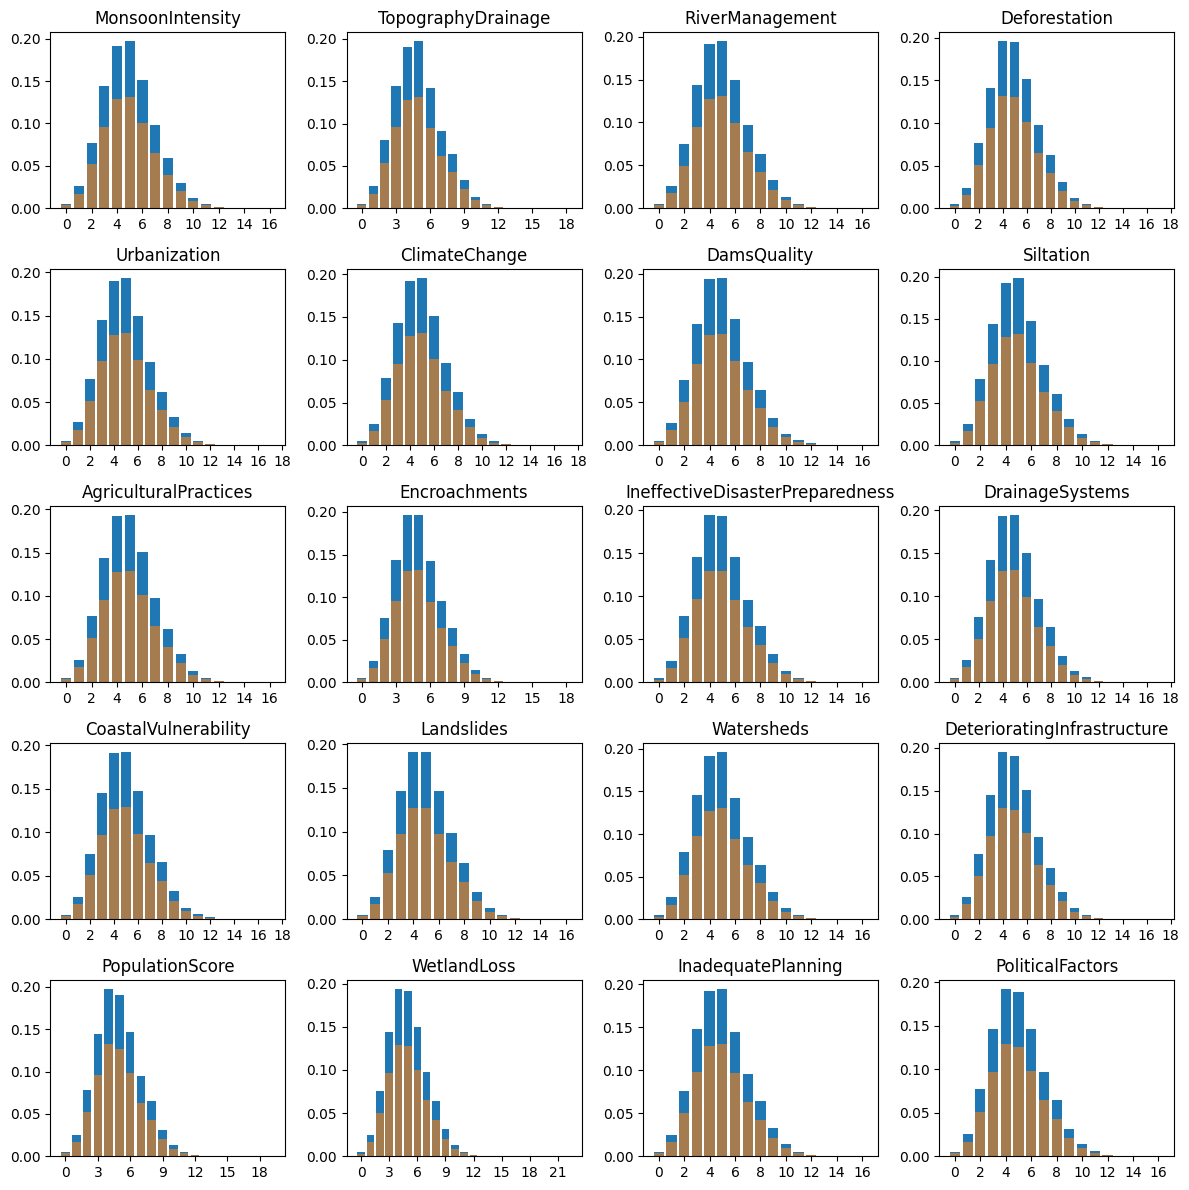

In [8]:
initial_features = list(test.columns)
_, axs = plt.subplots(5, 4, figsize=(12, 12))
for col, ax in zip(initial_features, axs.ravel()):
    vc = train[col].value_counts() / len(train)
    ax.bar(vc.index, vc)
    vc = test[col].value_counts() / len(train)
    ax.bar(vc.index, vc, alpha=0.6)
    ax.set_title(col)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
plt.tight_layout()
plt.show()

## **TARGET DISTRIBUTION**

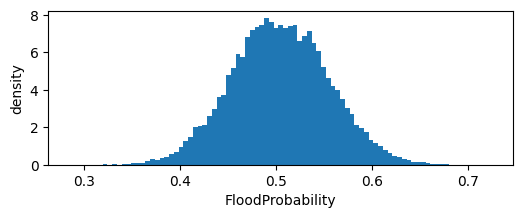

In [9]:
plt.figure(figsize=(6, 2))
plt.hist(train.FloodProbability, bins=np.linspace(0.285, 0.725, 90), density=True)
plt.ylabel('density')
plt.xlabel('FloodProbability')
plt.show()

## **MODEL TRAINING**

In [10]:
# 데이터 나누기
X = train.drop(['FloodProbability'], axis=1)
Y = train['FloodProbability']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_val = test

Y_val = sample

In [11]:
# xgb 파라미터
xgb_params = {
    'grow_policy': 'depthwise',
    'n_estimators': 100,
    'learning_rate': 0.2639887908316703,
    'max_depth': 10,
    'reg_lambda': 62.46661785864016,
    'min_child_weight': 0.33652299514909034,
    'colsample_bytree': 0.2319730052165745,
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'max_bin': 2048,
    'gamma': 0
}

In [12]:
# 파이프라인 정의
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(**xgb_params))
])

lgbm_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lgbm', LGBMRegressor(verbose=-1, random_state=42))
])

cb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('cb', CatBoostRegressor(verbose=False, random_state=42))
])

In [13]:
# Pipe Line으로 모델 훈련
xgb_pipeline.fit(X_train, Y_train)
lgbm_pipeline.fit(X_train, Y_train)
cb_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('cb',
                 <catboost.core.CatBoostRegressor object at 0x781d9f1c1db0>)])

In [14]:
# 테스트 데이터에 대한 예측
xgb_pred = xgb_pipeline.predict(X_test)
lgbm_pred = lgbm_pipeline.predict(X_test)
cb_pred = cb_pipeline.predict(X_test)

## **MODEL VALIDATION**

In [15]:
# 성능 평가 (R² 스코어 계산)
xgb_r2_score = r2_score(Y_test, xgb_pred)
lgbm_r2_score = r2_score(Y_test, lgbm_pred)
cb_r2_score = r2_score(Y_test, cb_pred)

In [16]:
print("XGBRegressor R² Score:", xgb_r2_score)
print("LightGBMRegressor R² Score:", lgbm_r2_score)
print("CatBoostRegressor R² Score:", cb_r2_score)

XGBRegressor R² Score: 0.8384423625867583
LightGBMRegressor R² Score: 0.7656664606302841
CatBoostRegressor R² Score: 0.8461505641744447


In [17]:
model_list = ['XGBRegressor', 'LightGBMRegressor', 'CatBoostRegressor']
score_list = [xgb_r2_score, lgbm_r2_score, cb_r2_score]

print(f"Most R2 Score : {max(score_list)}")
print(f"Most Great Model : {model_list[score_list.index(max(score_list))]}")

Most R2 Score : 0.8461505641744447
Most Great Model : CatBoostRegressor


Text(0.5, 1.0, 'Probability vs. Predicted Probability for CatBoostRegressor')

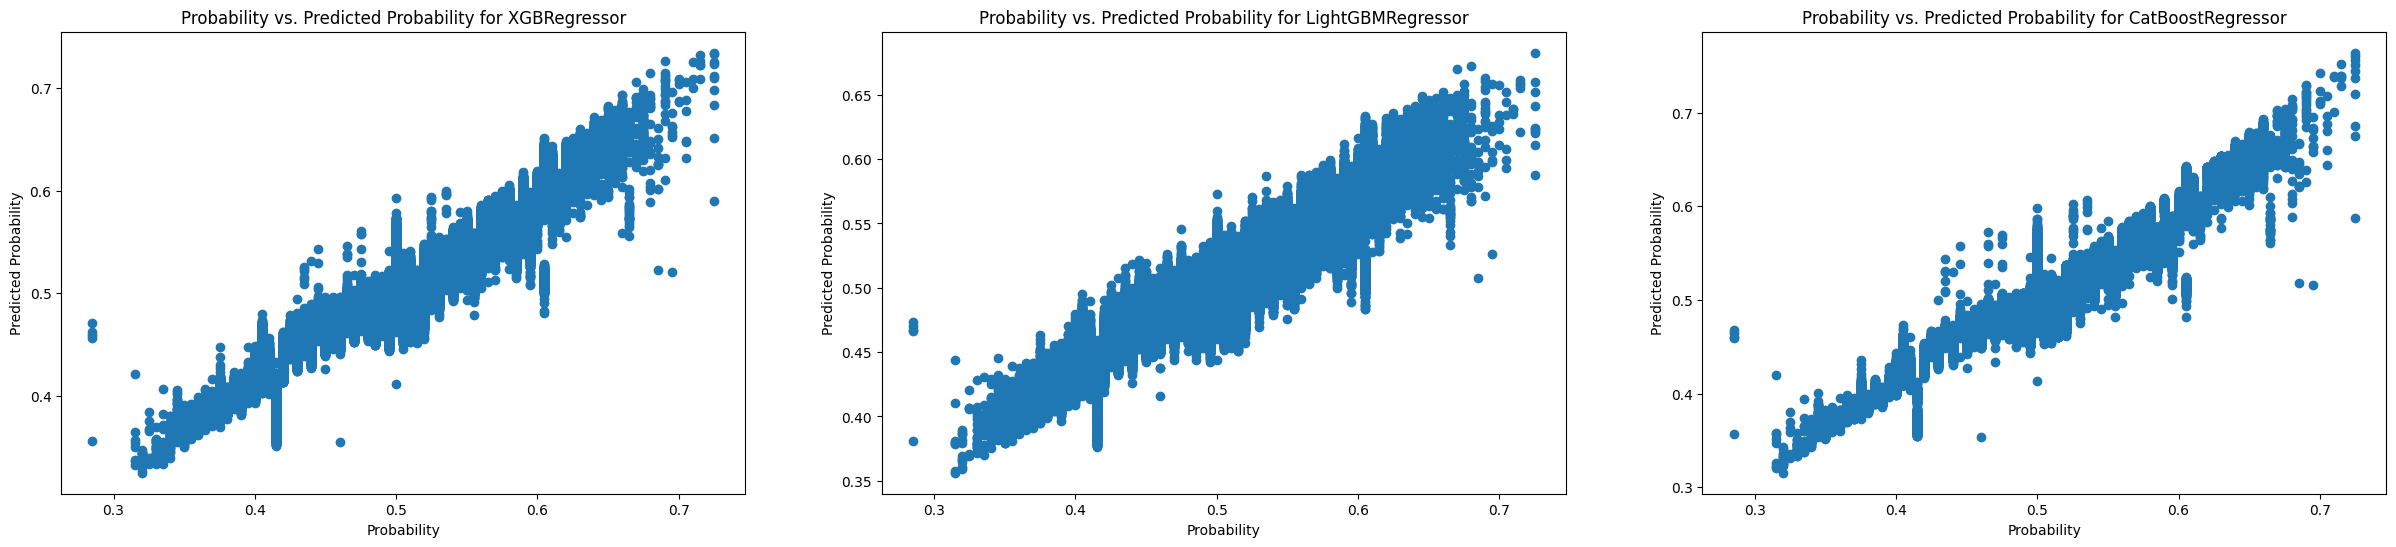

In [18]:
# 서브플롯 생성 및 설정
plt.figure(figsize=(30,6))

# 1st
plt.subplot(1,3,1)
plt.scatter(Y_test, xgb_pred)
plt.xlabel("Probability")
plt.ylabel("Predicted Probability")
plt.title("Probability vs. Predicted Probability for XGBRegressor")

# 2nd
plt.subplot(1,3,2)
plt.scatter(Y_test, lgbm_pred)
plt.xlabel("Probability")
plt.ylabel("Predicted Probability")
plt.title("Probability vs. Predicted Probability for LightGBMRegressor")

# 3rd
plt.subplot(1,3,3)
plt.scatter(Y_test, cb_pred)
plt.xlabel("Probability")
plt.ylabel("Predicted Probability")
plt.title("Probability vs. Predicted Probability for CatBoostRegressor")

## **SUBMISSION**

In [19]:
sel_model = model_list[score_list.index(max(score_list))]

if sel_model == 'XGBRegressor':
    Y_sub = xgb_pipeline.predict(X_val)
    
elif sel_model == 'LightGBMRegressor':
    Y_sub = lgbm_pipeline.predict(X_val)
    
elif sel_model == 'CatBoostRegressor':
    Y_sub = cb_pipeline.predict(X_val)


In [20]:
pred_df = pd.DataFrame({'id':test.index, 'FloodProbability':Y_sub})

# Save predictions to CSV
pred_df.to_csv('predictions.csv', index=False)

In [21]:
pred_df

,id,FloodProbability
0,1117957,0.574311
1,1117958,0.456400
2,1117959,0.454659
3,1117960,0.466799
4,1117961,0.465791
...,...,...
745300,1863257,0.476643
745301,1863258,0.451503
745302,1863259,0.626630
745303,1863260,0.551915
